In [1]:
#기본 라이브러리들
import numpy as np   # 수치연산
import pandas as pd  # 데이터프레임(2차원) 
import matplotlib.pyplot as plt  # 그래프
import seaborn as sns

# 스케일링
from sklearn.preprocessing import *

# 데이터 분할
from sklearn.model_selection import train_test_split  

# 모델링
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC, SVR

# 검증
from sklearn.metrics import *

# 성능
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import statsmodels.api as sm

# Modeling
- 데이터로부터 패턴을 찾아 수학식으로 정리
- 오차가 적은 모델을 만드는 과정

### 목적
- 샘플을 가지고 전체를 추정

### 패턴을 찾는 방법 ( 머신러닝 알고리즘 )
	- 답이 있는 문제(지도학습) : 답을 알려주면서 패턴을 찾게하기.  
		숫자(회귀)와 범주(분류)의 답
	- 답이 없는 문제(비지도학습) : 비슷한 데이터끼리 모아서 데이터 안에서 패턴을 찾기

### 오차 : 실제 값 = 모델 + 오차
- 자료가 벗어나는 정도 ∑(실제 값 - 모델)^2




### 과정 : 데이터확인 및 전처리 -> 선언(설계) -> 학습(모델링) -> 검증(예측, 평가)

# sklearn 모델

## 회귀모델(Regression)

### 1) 데이터 확인 및 전처리

In [28]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)

In [29]:
data.drop(['black'], axis = 1, inplace = True)

In [30]:
target = 'medv'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

* 스케일링

In [38]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
x_train_mm = mm_scaler.fit_transform(x_train)
x_train_st = st_scaler.fit_transform(x_train)
x_val_mm = mm_scaler.fit_transform(x_val)
x_val_st = st_scaler.fit_transform(x_val)

### 2. 선언

### LinearRegression

In [32]:
linear_model = LinearRegression()


### K-Nearest Neighbors

In [36]:
k = int(y_val.count() ** 0.5)
k

12

In [37]:
knn_model_e_reg = KNeighborsRegressor(n_neighbors=k, metric='euclidean')

knn_model_m_reg = KNeighborsRegressor(n_neighbors=k, metric='manhattan')


### 3. 학습

In [39]:
linear_model.fit(x_train, y_train)
knn_model_e_reg.fit(x_train_mm, y_train)
knn_model_m_reg.fit(x_train_mm, y_train)

KNeighborsRegressor(metric='manhattan', n_neighbors=12)

### 4. 예측

In [40]:
linear_pred = linear_model.predict(x_val)
knn_e_pred = knn_model_e_reg.predict(x_val_mm)
mkk_m_pred = knn_model_m_reg.predict(x_val_mm)

### 5. 검증

In [42]:
name = ['LinearRegression', 'KNeighborsRegressor_e', 'KNeighborsRegressor_m']
list_pred = [linear_pred, knn_e_pred, mkk_m_pred]

for n, p in zip(name, list_pred):
    print(n)
    print(f'r2_score : {r2_score(y_val, p)}')
    print(f'mse : {mean_squared_error(y_val, p)}')
    print(f'rmse : {mean_squared_error(y_val, p, squared=False)}')
    print(f'mae : {mean_absolute_error(y_val, p)}')
    print(f'mape : {mean_absolute_percentage_error(y_val, p)}')
    print('**' * 15)

LinearRegression
r2_score : 0.6659250862095887
mse : 27.024021790749117
rmse : 5.198463406695205
mae : 3.4151954170252057
mape : 0.15485848578166633
******************************
KNeighborsRegressor_e
r2_score : 0.5956828422399985
mse : 32.70606451023393
rmse : 5.718921621270389
mae : 3.3805921052631582
mape : 0.1410072162096308
******************************
KNeighborsRegressor_m
r2_score : 0.6357484130178679
mse : 29.46507629751462
rmse : 5.4281743061101695
mae : 3.2275767543859653
mape : 0.13509807450544373
******************************


## 분류모델(Classifier)

### 1) 데이터 확인 및 전처리

In [136]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_simple2.CSV"
data = pd.read_csv(path)
data

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4
...,...,...,...,...,...,...,...,...,...,...,...
1191,0,32,5,1555,Female,2,Married,5878,No,12,12
1192,0,27,19,1619,Male,1,Divorced,4066,No,11,7
1193,0,29,9,1558,Male,3,Married,2451,No,18,5
1194,0,29,2,469,Male,3,Married,4649,No,14,4


In [137]:
data.drop('EmployeeNumber', axis = 1, inplace = True)

In [138]:
target = 'Attrition'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [139]:
cat_cols = ['Gender','JobSatisfaction','MaritalStatus','OverTime']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

In [140]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

* 스케일링

In [141]:
mm_scaler = MinMaxScaler()
st_scaler = StandardScaler()
x_train_mm = mm_scaler.fit_transform(x_train)
x_train_st = st_scaler.fit_transform(x_train)
x_val_mm = mm_scaler.fit_transform(x_val)
x_val_st = st_scaler.fit_transform(x_val)

### 2. 선언

### LogisticRegression

In [142]:
logtc_model = LogisticRegression()

### KNeighborsClassifier

In [143]:
k = int(y_val.count() ** 0.5)
k

18

In [144]:
knn_model_cla_e = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
knn_model_cla_m = KNeighborsClassifier(n_neighbors=k, metric='manhattan')

### DecisionTreeClassifier

In [145]:
dtree_model = DecisionTreeClassifier(max_depth=3)

### SVC

In [156]:
svc_model = SVC(C=10, gamma=50)

### 3. 학습

In [157]:
logtc_model.fit(x_train, y_train)
dtree_model.fit(x_train, y_train)
knn_model_cla_e.fit(x_train_mm, y_train)
knn_model_cla_m.fit(x_train_mm, y_train)
svc_model.fit(x_train_mm, y_train)


c:\Users\mskyu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(C=10, gamma=50)

### 4. 예측

In [158]:
logtc_pred = logtc_model.predict(x_val)
knn_e_pred = knn_model_cla_e.predict(x_val_mm)
knn_m_pred = knn_model_cla_m.predict(x_val_mm)
dtree_pred = dtree_model.predict(x_val)
svc_pred = svc_model.predict(x_val_mm)

### 5. 검증

In [159]:
name = ['LogisticRegression', 'KNeighborsClassifier_e', 'KNeighborsClassifier_m', 'DecisionTreeClassifier', 'SVC']
list_pred = [logtc_pred, knn_e_pred, knn_m_pred, dtree_pred, svc_pred]

for n, p in zip(name, list_pred):
    print(n)
    print(confusion_matrix(y_val, p))
    print(classification_report(y_val, p))
    print('**'*15)

LogisticRegression
[[293   0]
 [ 56  10]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       293
           1       1.00      0.15      0.26        66

    accuracy                           0.84       359
   macro avg       0.92      0.58      0.59       359
weighted avg       0.87      0.84      0.79       359

******************************
KNeighborsClassifier_e
[[293   0]
 [ 63   3]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       293
           1       1.00      0.05      0.09        66

    accuracy                           0.82       359
   macro avg       0.91      0.52      0.49       359
weighted avg       0.86      0.82      0.75       359

******************************
KNeighborsClassifier_m
[[293   0]
 [ 64   2]]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90       293
           1       1.00      0.03      0.

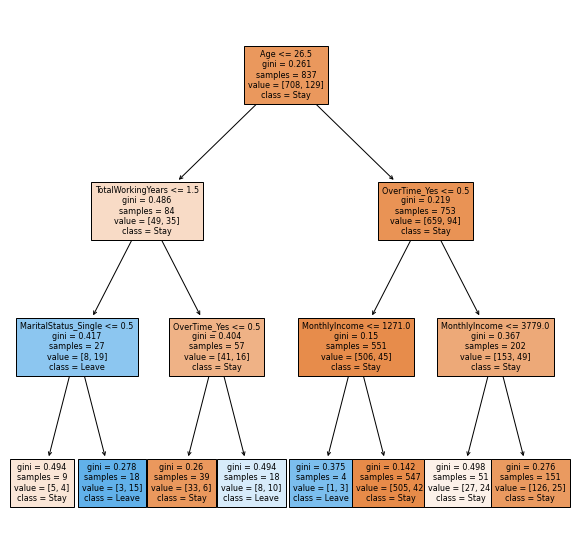

In [152]:
plt.figure(figsize=(10,10))
plot_tree(dtree_model
        , feature_names = list(x_train)
        , class_names= ['Stay', 'Leave']
        , filled = True
        , fontsize = 8)
plt.show()

# 성능 튜닝